## ESP32<>nrfConnect<>Python







#### What to do with the weird hex data being received from the nrfLogger in text form? Kindly follow the below mentioned steps. 

The codes used here has been developed by Ravi Prakash with directional important inputs from Saksham Jain 


Installling libraries for the normal functioning of our program. In absence of any of the below library please uncomment and run the code or write the most updated version following the syntax.

In [441]:
#!pip3 install pyserial    
#!pip3 install numpy
#!pip3 install scipy
#!pip3 install matplotlib
#!pip3 install pyqtgraph 


Note: The above code install libraries for Python version >= 3.0. If by god's grace you find yourself using Python 2.0, please use "!pip" instead of "!pip3". 

!pip install pyserial // for Python version 2.x
!pip3 install pyserial // for Python version 3.x

Run the below code for importing the libraries

In [455]:
import serial
import numpy as np
import pandas as pd
import scipy.fftpack
import datetime as dt
import time
import matplotlib.pyplot as plt
from pyqtgraph.Qt import QtGui, QtCore
import pyqtgraph as pg
import os
from io import StringIO as io   

Background: We receive the data from nrfConnect in text file format. Not all of it is the data that "we need" and some filtering has to be done. 

To save time and effort, this script can be used to :
- open a text file
- filter out the extact acceleration data(X,Y,Z) that we need in String format
- convert the data to int
- plot a beautiful graph given the gathered data is beautiful

In [457]:
f = open("210214_mpu6050_2.txt", "r") #open a text file in "read only" mode
f1=f.read() #storing the file data into a variable as String

f2=f1.split("\n") #Splitting the data at every line 
f3=pd.DataFrame({"raw_data":f2,"index":0}) #Creating a DataFrame to store the split data into different lines 

f4=f3  # Just a  intermediary variable

#filters out the values which has "A" as an index in the first column
f5=f4.set_index('raw_data').filter(regex='^A', axis=0) 

f7 = f6[f6[0]=="A"] 
f7

,0,1,2
38,A,19:21:42.311,"""Notifications enabled"" sent"
41,A,19:21:43.999,"""(0x) 01"" received"
43,A,19:21:46.024,"""(0x) 01"" received"
45,A,19:21:48.004,"""(0x) 01"" received"
49,A,19:21:49.737,"""Between 0 to 1000 Hz"" received"
...,...,...,...
1044,A,19:37:59.051,"""(0x) 01-AB-2C"" received"
1046,A,19:38:01.078,"""(0x) 01-AC-2C"" received"
1048,A,19:38:03.059,"""(0x) 01-AD-2C"" received"
1050,A,19:38:05.086,"""(0x) 01-AE-2C"" received"


As you see, this data has lots of unwanted things and the index on the left is alternating numbers and it might even contain NAN values. 
Time for additional processing. 

In [444]:

index = list(range(1, 429))



In [458]:
 
f6=f4["raw_data"].str.split("\t", n = 2, expand = True) #Splitting raw data values in two at every space("\t")
f8=pd.DataFrame(columns=["time","hex_data"]) 
f8["hex_data"]=f7[2].str[5:14]  # In column no 2 (actually 3)
# 5:14 comes from our observation that the data starts at 5 and ends at 14 
# It ignores rest of the values

f8["time"] = f7[1] 
f9=f8["hex_data"].str.split("\-", n = 2, expand = True) 
#Splitting data values in two at every space("\-") into 3 different acceleration values

f9=f9.dropna() #dropping the NAN Values
f9.describe()


,0,1,2
count,428,428,428
unique,1,256,1
top,01,8B,2C
freq,428,2,428


In [467]:
#Note the 428 values as frequency. We need a list of that size to have a standard index for the same length

index = list(range(1, 429))
f10 = pd.DataFrame (columns=["time","Acc_X","Acc_Y","Acc_Z"]) #Creating our final DataFrame
f10["time"]= f8["time"]
f10["Acc_X"] = (f9[0])
f10["Acc_Y"] = (f9[1])
f10["Acc_Z"] = (f9[2])

f10=f10.dropna()
f10["Index"] = index
f10

,time,Acc_X,Acc_Y,Acc_Z,Index
165,19:23:52.655,01,04,2C,1
171,19:23:54.676,01,05,2C,2
177,19:23:56.637,01,06,2C,3
179,19:23:58.681,01,07,2C,4
181,19:24:00.663,01,08,2C,5
...,...,...,...,...,...
1044,19:37:59.051,01,AB,2C,424
1046,19:38:01.078,01,AC,2C,425
1048,19:38:03.059,01,AD,2C,426
1050,19:38:05.086,01,AE,2C,427


In [468]:
#Converting the columns to integer from base 16 
f10['Acc_X'] = f10['Acc_X'].apply(lambda x: int(x,16))
f10['Acc_Y'] = f10['Acc_Y'].apply(lambda x: int(x,16))
f10['Acc_Z'] = f10['Acc_Z'].apply(lambda x: int(x,16))

In [470]:
#test
f10["Acc_Y"]

165       4
171       5
177       6
179       7
181       8
       ... 
1044    171
1046    172
1048    173
1050    174
1052    175
Name: Acc_Y, Length: 428, dtype: int64

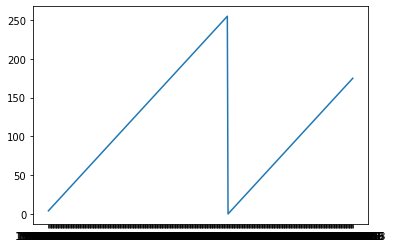

In [471]:
plt.plot(f10["time"], f10["Acc_Y"]) 